# **L**oading **A**nd **V**isualizing mrr dat**A** (LAVA)
Acknowledgments should be given to Bobby Jackson and Zach Sherman for their help as well

## Overview
Within this notebook, we will cover:
1. General overview of the MRR and its variables
2. Reading the MRR data through the CROCUS Thredds Server
3. Visualizing the radar data

## Prerequisites
| Concepts | Importance | Notes |
| -------- | ---------- | ----- |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |
| [Intro to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Helpful | Basic features |
 - **Time to learn**: 45 minutes
## Installation

This is all the installation required to run this code.

`conda env create -f mrr.yml`

# An Overview of the MRR-Pro
The MRR-Pro is a vertically pointing weather radar located at Northeastern Illinois University used to measure rain. It is used to collect data like reflectivity, radial velocity, drop size distribution, log attenuated power, signal to noise ratio, melting layer, doppler spectrum width, rainfall rate, and liquid water content. 

![alt text](/ecr-icon.jpg) 


## Imports

In [307]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings("ignore")
from siphon.catalog import TDSCatalog
import xarray as xr
import sys
import cmweather

## Data Preprocessing
Define a function used to make sure no files without data are counted.

In [310]:
def catch_bad_file(cds):
    try:
        return cds.remote_access(use_xarray=True)
    except:
        print("Exception: ", sys.exc_info()[0])

# Accessing the CROCUS Thredds server
The TDSCatalog is an object that stores the description of the THREDDS server. In this case it takes the CROCUS Thredds server URL. This creates a catalog of all the files so it is easier to call and use them.

In [311]:
cat_url = 'https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.html'
cat = TDSCatalog(cat_url)
print(list(cat.datasets.keys()))

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

## Testing the code
Let's do a test to see if you are able to access files on the Thredds server and if all the correct packages are installed. We will start with 2 files for now and will have to adjust for the time frames later. Eventually if you wanted to use the whole catalog you just need to change, `for cds in cat.datasets[1:3]`

In [312]:
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[1:3]]
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Shows the variables and names of the data in the dataset that can be used.

In [313]:
dsets

[<xarray.Dataset>
 Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                              spectrum_n_samples: 32)
 Coordinates:
   * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
   * time                    (time) datetime64[ns] 2023-06-01T02:00:00.0011051...
     elevation               (time) float32 ...
     azimuth                 (time) float32 ...
 Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
 Data variables: (12/31)
     volume_number           int32 ...
     time_coverage_start     |S128 ...
     time_coverage_end       |S128 ...
     time_reference          |S128 ...
     instrument_type         |S128 ...
     transfer_function       (range) float64 ...
     ...                      ...
     ML                      (time, range) float64 ...
     SNR                     (time, range) float32 ...
     index_spectra           (time, range) float64 ...
     spectrum_raw            (time, n

Shows the times that are being plotted.

In [315]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 720, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-01T02:00:00.001105152 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

## Sample plot using the test data
Plotting the figure and as you can see there is no precipitation.

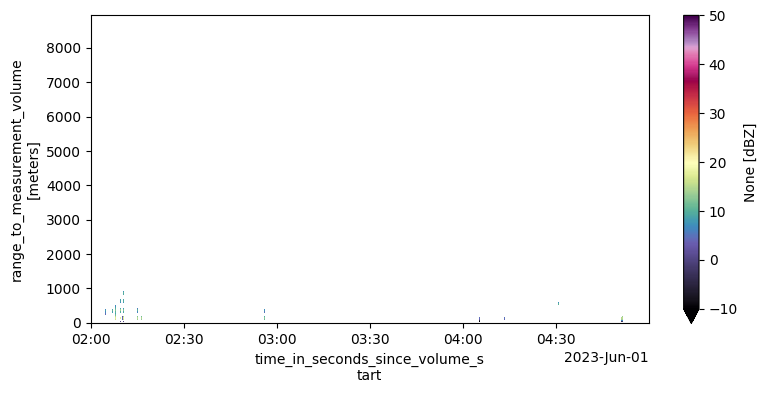

In [316]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
# Uncomment if you want to save and rename the figure
#plt.savefig('June 15.png', dpi=300, bbox_inches='tight')

# Visualizing the MRR data
## Plotting one hour in a single plot
The code cell below picks one hour in a single day and downloads it as a dataset and displays its attributes.

In [317]:
ds = cat.datasets[297]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-07-15T19:00:00.0067289...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

This is a plot of Equivalent Reflectivity vs. Height for June 11th, 2023 with a colorbar

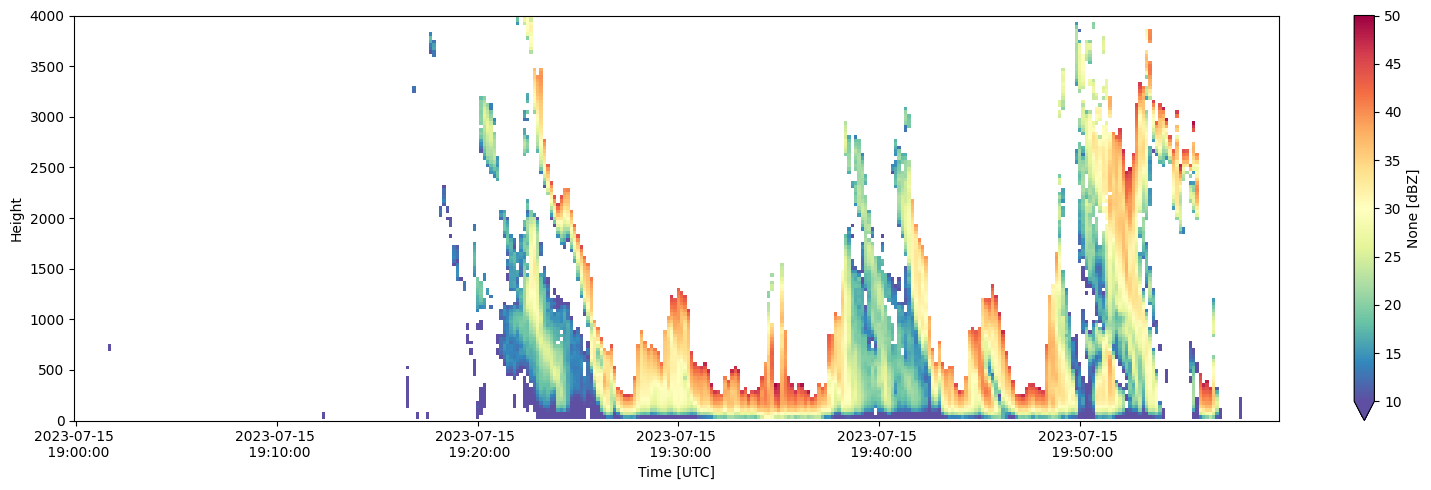

In [318]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 4000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

Let's show 4 plots in one, just in case you want to see how different variables interact. This is a graph of Attenuation Corrected Reflectivity, Doppler Velocity, Spectral Width, and Signal to Noise Ratio vs. Height.

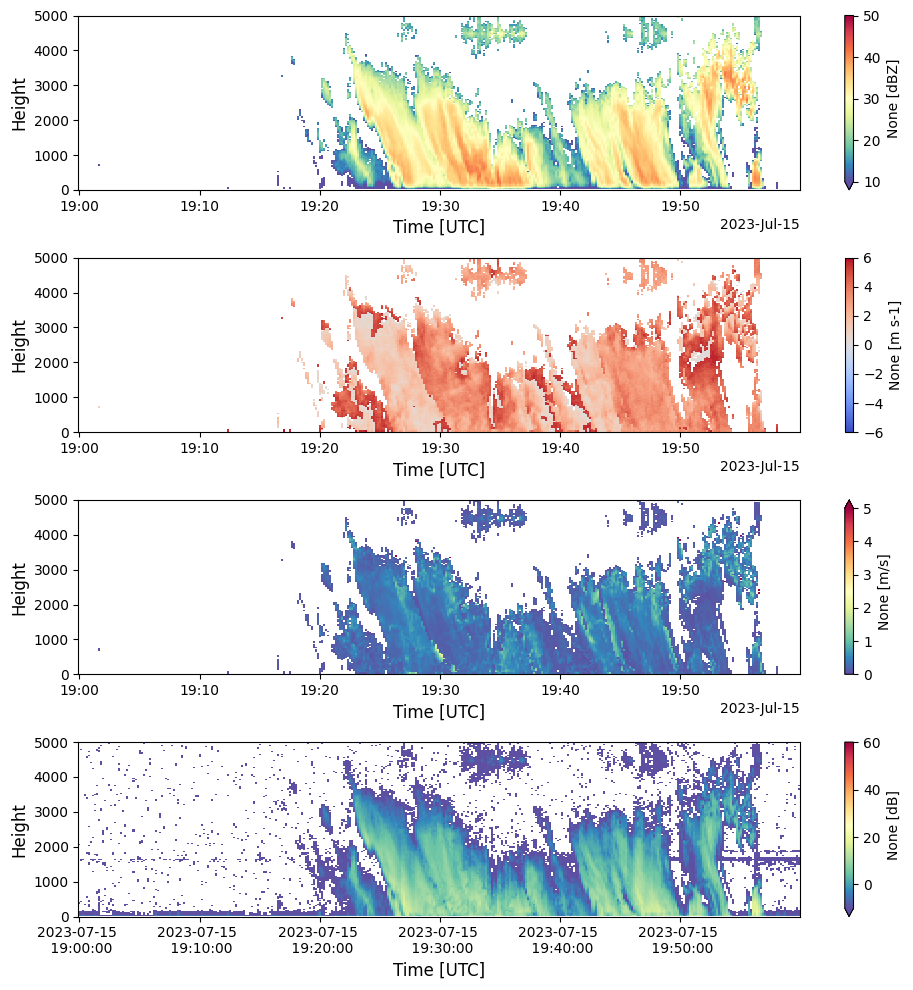

In [319]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Height', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Height', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Height', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('Height', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

## Plotting multiple hours in one plot
The code cell below picks multiple hours in a single day, in this case 9 hours, and removes empty datasets so it creates a better plot overall.

In [320]:
# list comprehension for files only doing 9 files for now
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[289:298]]
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


This shows the times that are being plotted and its attributes.

In [321]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-15T02:00:00.006705920 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

A plot of equivalent reflectivity for the hours of July 15th, 2023. As you notice there is rain at 19:00

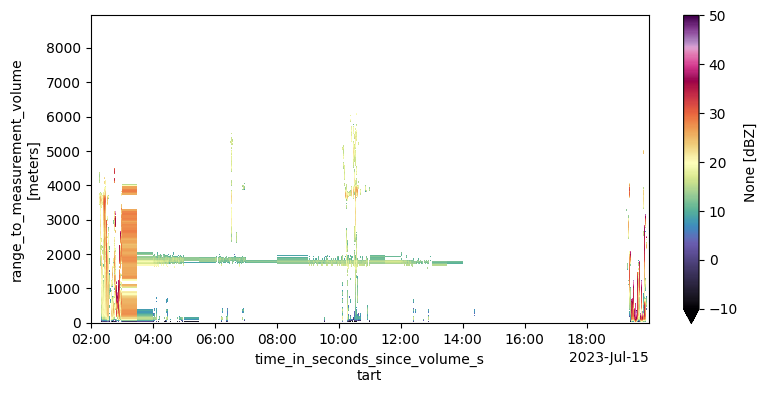

In [322]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
#plt.savefig('July 15.png', dpi=300, bbox_inches='tight')

## Summary
Within this notebook, we covered the basics of working with MRR radar data using the CROCUS Thredds Server, including:
- Reading the MRR data through the CROCUS Thredds Server
- Visualizing the radar data
## Resources and References
CROCUS Thredds Server essential link:
- [Thredds](https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.html)
